In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### KerasでMnistデータのダウンロード

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [3]:
# データの確認
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [4]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [5]:
X_train.shape

(60000, 784)

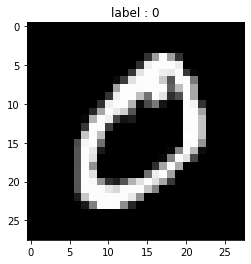

In [6]:
# 画像の可視化
index = 1
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

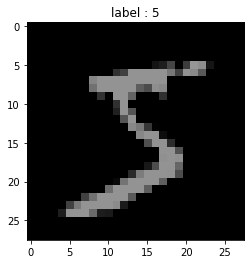

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [7]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray', vmin = 0, vmax = 255)
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

### 前処理

In [8]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [9]:
# One-hot_encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_o = enc.fit_transform(y_train[:, np.newaxis])
y_test_o = enc.fit_transform(y_test[:, np.newaxis])
print(y_train.shape)
print(y_train_o.shape)

(60000,)
(60000, 10)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_o, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


## ミニバッチ処理

In [11]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=10):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]


In [12]:
#　ミニバッチの取り出しコード
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0

# 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。


重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。


以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

In [13]:
n_features = 784
n_nodes1 = 400
n_nodes2 =  200
n_output = 10
sigma = 0.01 # ガウス分布の標準偏差
# 重み初期値
W1 = sigma * np.random.randn(n_features, n_nodes1)
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
W3 = sigma * np.random.randn(n_nodes2, n_output)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(784, 400)
(400, 200)
(200, 10)


In [14]:
# baiasの作成
b1 = np.zeros(n_nodes1)
b2 = np.zeros(n_nodes2)
b3 = np.zeros(n_output)

# 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。


各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

batch_size = 20 # バッチサイズ<br>
n_features = 784 # 特徴量の数<br>
n_nodes1 = 400 # 1層目のノード数<br>
n_nodes2 = 200 # 2層目のノード数<br>
n_output = 10 # 出力のクラス数（3層目のノード数）<br>

In [15]:
# シグモイド関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [16]:
# ハイポボリックタンジェント(np.tanh)

In [17]:
# ソフトマックス関数
def _softmax(x):
    x_max = np.max(x, axis=1).reshape(-1, 1)
    exp_x = np.exp(x - x_max.reshape(-1, 1))
    sum_exp_x = np.sum(exp_x, axis=1).reshape(-1, 1)
    return exp_x / sum_exp_x

In [18]:
#　第１層
a1 =  X_train @ W1 + b1
z1 = np.tanh(a1)
z1.shape

(48000, 400)

In [19]:
# 第2層
a2 = z1 @ W2 + b2
z2 = np.tanh(a2)
z2.shape

(48000, 200)

In [20]:
# 第3層
a3 = z2 @ W3 + b3
print(a3.shape)
z3 = _softmax(a3)
z3

(48000, 10)


array([[0.09989017, 0.10013766, 0.09974636, ..., 0.09969215, 0.09948346,
        0.10043063],
       [0.0996211 , 0.10000373, 0.10023103, ..., 0.09970306, 0.0998085 ,
        0.10021762],
       [0.09984077, 0.10004041, 0.10002585, ..., 0.10010066, 0.10006689,
        0.09993835],
       ...,
       [0.0999402 , 0.09979402, 0.10014717, ..., 0.10034525, 0.10011988,
        0.09977516],
       [0.10004845, 0.09991351, 0.10025405, ..., 0.10024555, 0.09998855,
        0.09992914],
       [0.09984008, 0.10004954, 0.10020579, ..., 0.1003654 , 0.09968603,
        0.10021474]])

# 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。<br>
yij: j番目のサンプルの k番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）<br>
z3ij : j 番目のサンプルの k 番目のクラスの確率（スカラー）<br>
nb : バッチサイズ、batch_size<br>
nc : クラスの数、n_output（今回のMNISTでは10）<br>

In [21]:
def cross_entropy(y, z3, n):
    """
    パラメータ
    ーーーーーーーーーーーーー
    y : 正解ラベル（one-hot表現）
    z３　：　クラスの確率
    n : バッチサイズ
    
    """
    L = (- 1 / n) * np.sum(y.T @ np.log(z3))
    return L

In [22]:
y_d = cross_entropy(y_train, z3, 1)
y_d

1105242.0109261533

# 【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。
数式を以下に示します。

In [23]:
# 学習率
alpha = 0.001

# 第３層
b_a3 = z3 - y_train
b_b3 = np.sum(b_a3)
b_W3 = z2.T @ b_a3
b_z2 = b_a3 @ W3.T

print(b_a3.shape)
print(b_b3.shape)
print(b_W3.shape)
print(b_z2.shape)

(48000, 10)
()
(200, 10)
(48000, 200)


In [24]:
# 第２層
b_a2 = b_z2 * (1 - np.tanh(a2))
b_b2 = np.sum(b_a2)
b_W2 = z1.T @ b_a2
b_z1 = b_a2 @ W2.T
print(b_a2.shape)
print(b_b2.shape)
print(b_W2.shape)
print(b_z1.shape)

(48000, 200)
()
(400, 200)
(48000, 400)


In [25]:
# 第１層
b_a1 = b_z1 * (1- np.tanh(a1))
b_b1 = np.sum(b_a1)
b_W1 = X_train.T @ b_a1

In [26]:
# 各層の更新
W3 = W3 - alpha * b_W3
b3 = b1 - alpha * b_b3

W2 = W2 - alpha * b_W2
b2 = b2 - alpha * b_b2

W1 = W1 - alpha * b_W1
b1 = b1 - alpha * b_b1

# 【問題5】推定
推定を行うメソッドを作成してください。
フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。



In [27]:
def predict(z3):
    return np.argmax(z3, axis=1)

In [28]:
predict(z3).shape

(48000,)

## 　最終的なクラス

In [56]:
#ニューラルネットワークのスクラッチ
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------

    Attributes
    ----------
    """
    def __init__(self, alpha=0.01 , n_iter=20,  batch=20, verbose = False):
        self.alpha = alpha
        self.iter = n_iter
        self.batch = batch
        self.verbose = verbose
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        n_features = 784
        n_nodes1 = 400
        n_nodes2 =  200
        n_output = 10
        
        sigma = 0.01 # ガウス分布の標準偏差
        # 重み初期値
        self.W1 = sigma * np.random.randn(n_features, n_nodes1)
        self.W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
        self.W3 = sigma * np.random.randn(n_nodes2, n_output)

        # baias初期値
        self.b1 = sigma * np.random.randn(n_nodes1)
        self.b2 = sigma * np.random.randn(n_nodes2)
        self.b3 = sigma * np.random.randn(n_output)
        
        for i in range(self.iter):
            #　ミニバッチの取り出しコード
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch)
            for mini_X_train, mini_y_train in get_mini_batch:
                self.mini_y = mini_y_train 
                #forwoard
                z1, z2, z3 = self._forward(mini_X_train)

                # back_propagation
                b_b1,b_W1, b_b2, b_W2, b_b3, b_W3 = self._back_pro(z1, z2, z3, mini_X_train, mini_y_train)

                # 各層重み、バイアスの更新
                self.W3 = self.W3 - self.alpha * b_W3
                self.b3 = self.b3 - self.alpha * b_b3

                self.W2 = self.W2 - self.alpha * b_W2
                self.b2 = self.b2 - self.alpha * b_b2

                self.W1 = self.W1 - self.alpha * b_W1
                self.b1 = self.b1 - self.alpha * b_b1
            
            # forward
            _, _, z3 = self._forward(X)
            self.loss[i] = self._cross_entropy(y, z3)
            
            if self.verbose:
                #verboseをTrueにした際は学習過程などを出力する
                print(self.loss[i])
            
            # X_valあった場合の処理
            if np.any(X_val): 
                _, _, val_z3 = self._forward(X_val)
                # 学習記録
                self.val_loss[i] = self._cross_entropy(y_val, val_z3)
                if self.verbose:
                    print(self.val_loss[i])

    
    def _forward(self, x):
        #forwoard
        #　第１層
        self.a1 =  (x @ self.W1) + self.b1
        z1 = np.tanh(self.a1)

        # 第2層
        self.a2 = (z1 @ self.W2) + self.b2
        z2 = np.tanh(self.a2)

        # 第3層
        self.a3 = (z2 @ self.W3) + self.b3
        z3 = self._softmax(self.a3)
        
        return z1, z2, z3

    def _back_pro(self, z1, z2, z3,X, y):
        # 第３層
        b_a3 = z3 - y
        b_b3 = np.mean(b_a3, axis=0)
        b_W3 = z2.T @ b_a3
        b_z2 = b_a3 @ self.W3.T

        # 第２層
        b_a2 = b_z2 * (1 - np.tanh(self.a2)**2)
        b_b2 = np.mean(b_a2, axis=0)
        b_W2 = z1.T @ b_a2
        b_z1 = b_a2 @ self.W2.T

        # 第１層
        b_a1 = b_z1 * (1- np.tanh(self.a1)**2)
        b_b1 = np.mean(b_a1, axis=0)
        b_W1 = X.T @ b_a1
        
        return  b_b1,b_W1, b_b2, b_W2, b_b3, b_W3
    
    # ソフトマックス関数
    def _softmax(self, x):
        x_max = np.max(x, axis=1)
        exp_x = np.exp(x - x_max.reshape(-1, 1))
        sum_exp_x = np.sum(exp_x, axis=1).reshape(-1, 1)
        return exp_x / sum_exp_x
    
    def _cross_entropy(self, y, z3):
        """
        パラメータ
        ーーーーーーーーーーーーー
        y : 正解ラベル（one-hot表現）
        z３　：　クラスの確率
        n : バッチサイズ

        """
        if y.ndim == 1:    # 次元が 1 の場合
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)
        batch_size = y.shape[0]
        return -np.sum(y * np.log(z3 + 1e-7)) / batch_size
    
    # 推定
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        _, _, z3 = self._forward(X)
        
        return np.argmax(z3, axis= 1)

# 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [57]:
SNNC = ScratchSimpleNeuralNetrowkClassifier()

In [58]:
y_valmax = np.argmax(y_val, axis=1)

In [59]:
SNNC.fit(X_train, y_train, X_val, y_val)

In [60]:
y_pred = SNNC.predict(X_test)

In [61]:
yv_pred = SNNC.predict(X_val)

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_valmax, yv_pred))

0.9788
0.9775833333333334


In [63]:
print(y_valmax.shape)
print(np.sum(y_valmax == yv_pred))

(12000,)
11731


In [64]:
print(SNNC.val_loss)

[0.22771439 0.15140095 0.13210081 0.12478614 0.10876812 0.12580452
 0.1126586  0.11671899 0.10253641 0.09931247 0.0934698  0.09975253
 0.09582576 0.09313447 0.09266714 0.09377172 0.09421205 0.09473387
 0.09520429 0.09564072]


# 【問題7】学習曲線のプロット
学習曲線をプロットしてください

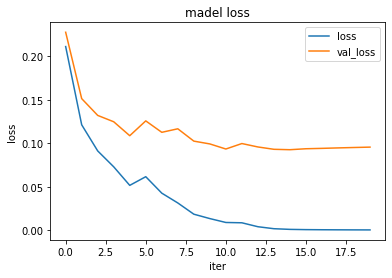

In [65]:
plt.plot(SNNC.loss, label="loss")
plt.plot(SNNC.val_loss, label="val_loss")
plt.ylabel('loss')
plt.xlabel('iter')
plt.title('madel loss')
plt.legend()
plt.show();

# 【問題8】（アドバンス課題）誤分類の確認
誤分類した画像はどのようなものだったかを確認してください。推定値を用意し、以下のコードを実行してください。

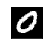

In [39]:
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証データの正解ラベル(n_samples,)
X_val : 検証データの特徴量（n_samples, n_features)
"""
import numpy as np
import matplotlib.pyplot as plt
num = 1 # いくつ表示するか
true_false = y_pred==y_test
false_list = np.where(true_false==False)[0].astype(np.int)
if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')